Experiment 2  - Traffic Prediction Based on Hour of the day

Predicting traffic volume based on hour of the day.

1. Data Fetching

In [1]:
import pandas as pd

# Loading dataset1
dataset1 = pd.read_csv('C:/Users/carol/OneDrive/Documents/Research/Dataset/Traffic_count.csv')

# Filtering rows
years = [2017, 2018, 2019, 2020, 2021]
hourdata = dataset1[dataset1['Year'].isin(years)]

# Sorting in ascending order
hourdata.sort_values(by='Year', ascending=True, inplace=True)

# Saving the fitered data to new dataset
hourdata.to_csv('data_traffic.csv')

C:\Users\carol\AppData\Local\Temp\ipykernel_28108\717381901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata.sort_values(by='Year', ascending=True, inplace=True)


In [2]:
print(hourdata.columns)

Index(['Count_point_id', 'Direction_of_travel', 'Year', 'Count_date', 'hour',
       'Region_id', 'Region_name', 'Region_ons_code', 'Local_authority_id',
       'Local_authority_name', 'Local_authority_code', 'Road_name',
       'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')


In [3]:
print(hourdata.dtypes)

Count_point_id                    int64
Direction_of_travel              object
Year                              int64
Count_date                       object
hour                              int64
Region_id                         int64
Region_name                      object
Region_ons_code                  object
Local_authority_id                int64
Local_authority_name             object
Local_authority_code             object
Road_name                        object
Road_category                    object
Road_type                        object
Start_junction_road_name         object
End_junction_road_name           object
Easting                           int64
Northing                          int64
Latitude                        float64
Longitude                       float64
Link_length_km                  float64
Link_length_miles               float64
Pedal_cycles                      int64
Two_wheeled_motor_vehicles        int64
Cars_and_taxis                  float64


2. Data Cleaning

In [4]:
# Checking for missing values
missing_values = hourdata.isnull().sum()
missing_values

Count_point_id                       0
Direction_of_travel                  0
Year                                 0
Count_date                           0
hour                                 0
Region_id                            0
Region_name                          0
Region_ons_code                      0
Local_authority_id                   0
Local_authority_name                 0
Local_authority_code                 0
Road_name                            0
Road_category                        0
Road_type                            0
Start_junction_road_name        726060
End_junction_road_name          726012
Easting                              0
Northing                             0
Latitude                             0
Longitude                            0
Link_length_km                  725148
Link_length_miles               725148
Pedal_cycles                         0
Two_wheeled_motor_vehicles           0
Cars_and_taxis                       0
Buses_and_coaches        

In [5]:
hourdata.drop(['Start_junction_road_name', 'End_junction_road_name'], axis=1, inplace=True)
# Filling missing values in 'Link_length_km' and 'Link_length_miles' with their median
# (Median is often used to fill missing values in case of skewed distributions)
hourdata['Link_length_km'].fillna(hourdata['Link_length_km'].median(), inplace=True)
hourdata['Link_length_miles'].fillna(hourdata['Link_length_miles'].median(), inplace=True)

# Check for missing values after the transformations
missing_values_after = hourdata.isnull().sum()

missing_values_after

C:\Users\carol\AppData\Local\Temp\ipykernel_28108\1023279825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata.drop(['Start_junction_road_name', 'End_junction_road_name'], axis=1, inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_28108\1023279825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata['Link_length_km'].fillna(hourdata['Link_length_km'].median(), inplace=True)
C:\Users\carol\AppData\Local\Temp\ipykernel_28108\1023279825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

Count_point_id                  0
Direction_of_travel             0
Year                            0
Count_date                      0
hour                            0
Region_id                       0
Region_name                     0
Region_ons_code                 0
Local_authority_id              0
Local_authority_name            0
Local_authority_code            0
Road_name                       0
Road_category                   0
Road_type                       0
Easting                         0
Northing                        0
Latitude                        0
Longitude                       0
Link_length_km                  0
Link_length_miles               0
Pedal_cycles                    0
Two_wheeled_motor_vehicles      0
Cars_and_taxis                  0
Buses_and_coaches               0
LGVs                            0
HGVs_2_rigid_axle               0
HGVs_3_rigid_axle               0
HGVs_4_or_more_rigid_axle       0
HGVs_3_or_4_articulated_axle    0
HGVs_5_articul

In [6]:
#checking for duplicate values
duplicate_count = hourdata.duplicated().sum()
print(f"There are {duplicate_count} duplicate rows.")

There are 0 duplicate rows.


In [7]:
# Print the number of records
print(f'The dataset contains {len(hourdata)} records.')

The dataset contains 1099968 records.


3. Data Transformation

In [8]:
# Feature Transformation: Extracting month from 'Count_date'
hourdata['month'] = pd.to_datetime(hourdata['Count_date']).dt.month

# Classifying 'hour' into peak and non-peak hours
def classify_hour(hour):
    if 7 <= hour <= 10:
        return 'morning_peak'
    elif 16 <= hour <= 18:
        return 'evening_peak'
    else:
        return 'non_peak'

hourdata['peak_non_peak_hour'] = hourdata['hour'].apply(classify_hour)

# Displaying missing values and the first few rows after transformations
hourdata[['Count_date', 'month', 'hour', 'peak_non_peak_hour']].head()


C:\Users\carol\AppData\Local\Temp\ipykernel_28108\3178744801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata['month'] = pd.to_datetime(hourdata['Count_date']).dt.month
C:\Users\carol\AppData\Local\Temp\ipykernel_28108\3178744801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourdata['peak_non_peak_hour'] = hourdata['hour'].apply(classify_hour)


,Count_date,month,hour,peak_non_peak_hour
495345,2017-03-23 00:00:00,3,11,non_peak
443151,2017-05-18 00:00:00,5,16,evening_peak
443152,2017-05-18 00:00:00,5,17,evening_peak
443153,2017-05-18 00:00:00,5,18,evening_peak
443154,2017-03-31 00:00:00,3,7,morning_peak


In [9]:
hourdata.dtypes

Count_point_id                    int64
Direction_of_travel              object
Year                              int64
Count_date                       object
hour                              int64
Region_id                         int64
Region_name                      object
Region_ons_code                  object
Local_authority_id                int64
Local_authority_name             object
Local_authority_code             object
Road_name                        object
Road_category                    object
Road_type                        object
Easting                           int64
Northing                          int64
Latitude                        float64
Longitude                       float64
Link_length_km                  float64
Link_length_miles               float64
Pedal_cycles                      int64
Two_wheeled_motor_vehicles        int64
Cars_and_taxis                  float64
Buses_and_coaches               float64
LGVs                              int64


4. Data Encoding

In [10]:
categorical_columns = ['Direction_of_travel', 'Region_name', 'Road_category', 'Road_type', 'peak_non_peak_hour']
hourdata = pd.get_dummies(hourdata, columns=categorical_columns)

In [11]:
hourdata.head()

,Count_point_id,Year,Count_date,hour,Region_id,Region_ons_code,Local_authority_id,Local_authority_name,Local_authority_code,Road_name,...,Road_category_MCU,Road_category_PA,Road_category_PM,Road_category_TA,Road_category_TM,Road_type_Major,Road_type_Minor,peak_non_peak_hour_evening_peak,peak_non_peak_hour_morning_peak,peak_non_peak_hour_non_peak
495345,944152,2017,2017-03-23 00:00:00,11,5,E12000002,76,Lancashire,E10000017,B6478,...,0,0,0,0,0,0,1,0,0,1
443151,941538,2017,2017-05-18 00:00:00,16,7,E12000006,78,Hertfordshire,E10000015,U,...,1,0,0,0,0,0,1,1,0,0
443152,941538,2017,2017-05-18 00:00:00,17,7,E12000006,78,Hertfordshire,E10000015,U,...,1,0,0,0,0,0,1,1,0,0
443153,941538,2017,2017-05-18 00:00:00,18,7,E12000006,78,Hertfordshire,E10000015,U,...,1,0,0,0,0,0,1,1,0,0
443154,941545,2017,2017-03-31 00:00:00,7,7,E12000006,78,Hertfordshire,E10000015,U,...,1,0,0,0,0,0,1,0,1,0


In [12]:
hourdata.dtypes

Count_point_id                            int64
Year                                      int64
Count_date                               object
hour                                      int64
Region_id                                 int64
Region_ons_code                          object
Local_authority_id                        int64
Local_authority_name                     object
Local_authority_code                     object
Road_name                                object
Easting                                   int64
Northing                                  int64
Latitude                                float64
Longitude                               float64
Link_length_km                          float64
Link_length_miles                       float64
Pedal_cycles                              int64
Two_wheeled_motor_vehicles                int64
Cars_and_taxis                          float64
Buses_and_coaches                       float64
LGVs                                    

In [13]:
# Saving the filtered dataset to a new CSV file
hourdata.to_csv('Final_Exp2.csv', index=False)

5. Database 

In [31]:
pip install pandas sqlalchemy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install psycopg2-binary

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from sqlalchemy import create_engine
import pandas as pd

# Replace the following variables according to your database
db_type = 'postgresql'  
user = 'postgres'
password = 'user'
host = 'localhost'
port = '5432'  # default for postgresql is 5432
dbname = 'TrafficData'
table_name = 'Exp2'

# Create the database engine
# PostgreSQL example
engine = create_engine(f'{db_type}://{user}:{password}@{host}:{port}/{dbname}')

# Connect to the database and download the table into a pandas DataFrame
with engine.connect() as conn, conn.begin():
    hourdata = pd.read_sql_table(table_name, conn)

In [34]:
print(hourdata.head())

   Count_point_id    Year Count_date  hour  Region_id  Local_authority_id  \
0        944152.0  2017.0 2017-03-23  11.0        5.0                76.0   
1        941538.0  2017.0 2017-05-18  16.0        7.0                78.0   
2        941538.0  2017.0 2017-05-18  17.0        7.0                78.0   
3        941538.0  2017.0 2017-05-18  18.0        7.0                78.0   
4        941545.0  2017.0 2017-03-31   7.0        7.0                78.0   

  Local_authority_name Local_authority_code Road_name   Easting  ...  \
0                    L                    E         B  376850.0  ...   
1                    H                    E         U  513386.0  ...   
2                    H                    E         U  513386.0  ...   
3                    H                    E         U  513386.0  ...   
4                    H                    E         U  547840.0  ...   

   Road_category_PA  Road_category_PM  Road_category_TA  Road_category_TM  \
0                 0        

6. Normality Test (Skewness and Kurtosis)

In [14]:
import pandas as pd
from scipy import stats

# Define alpha for hypothesis testing
alpha = 0.05

# Loop through each column in the DataFrame
for column in hourdata.columns:
    # Skipping non-numeric data
    if hourdata[column].dtype not in ['int64', 'float64']:
        continue
    
    stat, p = stats.shapiro(hourdata[column].dropna())  
    # Output the results of the normality test
    print(f'Column: {column}')
    print(f'  p-value: {p}')
    if p > alpha:
        print('  Data follows a normal distribution (fail to reject H0)\n')
    else:
        print('  Data does not follow a normal distribution (reject H0)\n')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column: Count_point_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Year
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: hour
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Region_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Local_authority_id
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Easting
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Northing
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Latitude
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Longitude
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Link_length_km
  p-value: 0.0
  Data does not follow a normal distribution (reject H0)

Column: Link_length_miles
  p-value: 0.0
  Data does not follow a normal distribution

In [15]:
import pandas as pd
from scipy.stats import skew, kurtosis

skewness_total_vehicles = skew(hourdata['All_motor_vehicles'])
kurtosis_total_vehicles = kurtosis(hourdata['All_motor_vehicles'], fisher=True)  # Fisher's definition

print(f"Skewness for 'All_motor_vehicles' column: {skewness_total_vehicles}")
print(f"Kurtosis for 'All_motor_vehicles' column: {kurtosis_total_vehicles}")

Skewness for 'All_motor_vehicles' column: 3.4800262525591283
Kurtosis for 'All_motor_vehicles' column: 15.561515243376519


In [16]:
# Calculate the IQR
Q1 = hourdata['All_motor_vehicles'].quantile(0.25)
Q3 = hourdata['All_motor_vehicles'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = hourdata[(hourdata['All_motor_vehicles'] < lower_bound) | (hourdata['All_motor_vehicles'] > upper_bound)]

# Remove outliers
hourdata = hourdata[~((hourdata['All_motor_vehicles'] < lower_bound) | (hourdata['All_motor_vehicles'] > upper_bound))]

print(f"Identified outliers:\n{outliers}")
print(f"Data without outliers:\n{hourdata}")


Identified outliers:
         Count_point_id  Year           Count_date  hour  Region_id  \
443343            89276  2017  2017-10-10 00:00:00     7          1   
443347            89276  2017  2017-10-10 00:00:00    11          1   
443348            89276  2017  2017-10-10 00:00:00    12          1   
443322            81271  2017  2017-09-06 00:00:00    13          5   
443351            89276  2017  2017-10-10 00:00:00    15          1   
...                 ...   ...                  ...   ...        ...   
4546815           37409  2021  2021-04-29 00:00:00    15          2   
4546816           37409  2021  2021-04-29 00:00:00    16          2   
4546817           37409  2021  2021-04-29 00:00:00    17          2   
4021325           91253  2021  2021-03-29 00:00:00     8          1   
4021324           91253  2021  2021-03-29 00:00:00     7          1   

        Region_ons_code  Local_authority_id Local_authority_name  \
443343        E12000009                 203             Pl

In [17]:
import pandas as pd
from scipy.stats import skew, kurtosis

skewness_total_vehicles = skew(hourdata['All_motor_vehicles'])
kurtosis_total_vehicles = kurtosis(hourdata['All_motor_vehicles'], fisher=True)  # Fisher's definition

print(f"Skewness for 'All_motor_vehicles' column: {skewness_total_vehicles}")
print(f"Kurtosis for 'All_motor_vehicles' column: {kurtosis_total_vehicles}")

Skewness for 'All_motor_vehicles' column: 1.4839501562874615
Kurtosis for 'All_motor_vehicles' column: 1.4088428811460165


In [18]:
# Print the number of records
print(f'The dataset contains {len(hourdata)} records.')

The dataset contains 992162 records.


7. Stationarity test 

In [19]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'hourdata' is your DataFrame and 'All_motor_vehicles' is the column you want to test
# If you only want to use, say, the last 1000 observations for the test:
subset = hourdata['All_motor_vehicles'][-200000:]

maxlag = 24
result = adfuller(subset, maxlag=maxlag)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Determine if the series is stationary based on the ADF test
if result[1] < 0.05:
    print('Time series is stationary (reject H0)')
else:
    print('Time series is not stationary (fail to reject H0)')


ADF Statistic: -43.575418
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Time series is stationary (reject H0)


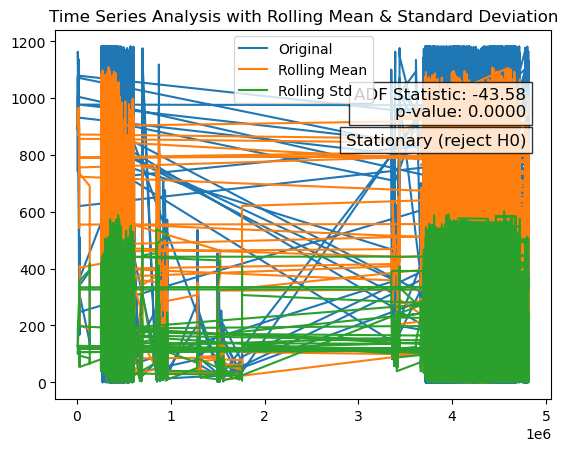

In [20]:
import matplotlib.pyplot as plt

# Rolling statistics
rolling_mean = hourdata['All_motor_vehicles'].rolling(window=12).mean()
rolling_std = hourdata['All_motor_vehicles'].rolling(window=12).std()

# Plotting the statistics along with the time series data
plt.plot(hourdata['All_motor_vehicles'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
# Annotating the plot with ADF Test results
plt.title('Time Series Analysis with Rolling Mean & Standard Deviation')
plt.text(0.95, 0.8, f'ADF Statistic: {result[0]:.2f}\np-value: {result[1]:.4f}', 
         horizontalalignment='right', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Check if the series is stationary and annotate
stationarity_status = 'Stationary (reject H0)' if result[1] < 0.05 else 'Not Stationary (fail to reject H0)'
plt.text(0.95, 0.7, stationarity_status, 
         horizontalalignment='right', verticalalignment='center', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

8. Visualisation

C:\Users\carol\AppData\Local\Temp\ipykernel_6480\4142186508.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


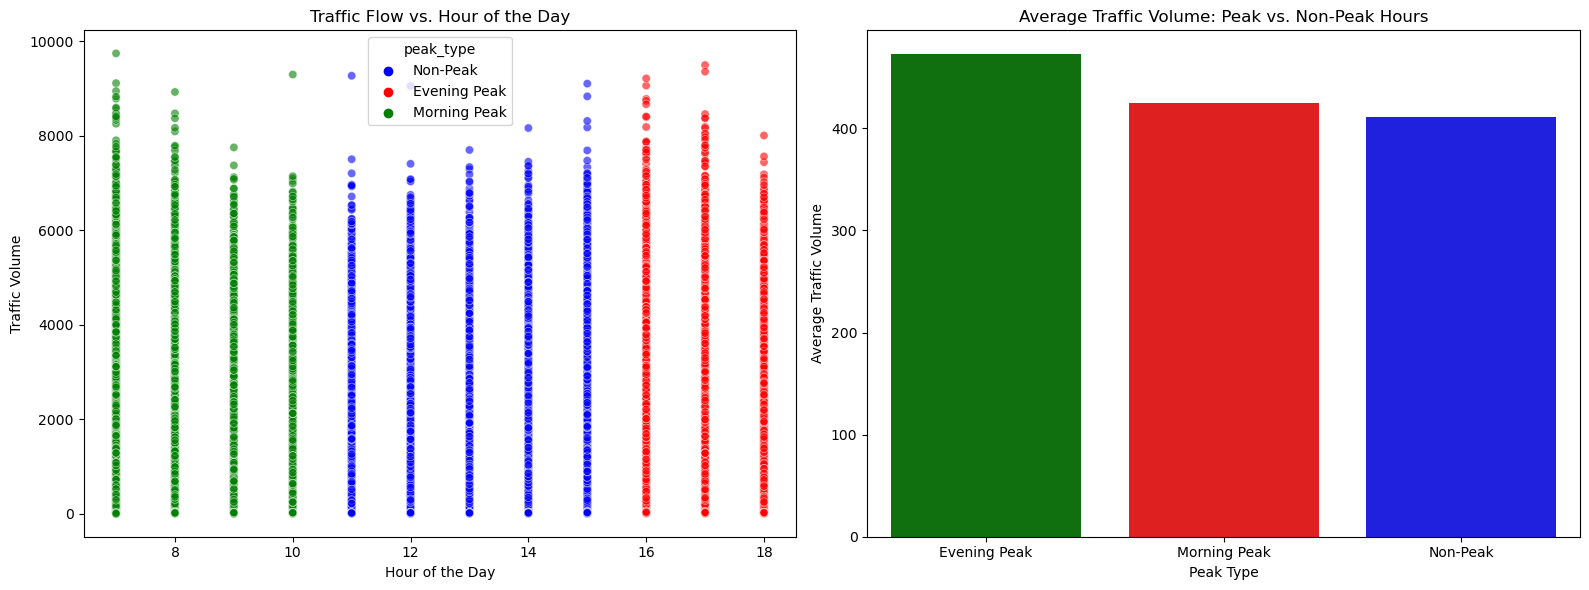

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming `df` is your DataFrame with the relevant columns
hour = pd.read_csv('C:/Users/carol/Final_Exp2.csv')

# Create a column for peak and non-peak classification for visualization
hour['peak_type'] = np.where(hour['peak_non_peak_hour_morning_peak'] == 1, 'Morning Peak',
                  np.where(hour['peak_non_peak_hour_evening_peak'] == 1, 'Evening Peak', 'Non-Peak'))

# Scatter plot for hourly traffic flow
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='hour', y='All_motor_vehicles', hue='peak_type', data=hour, palette=['blue', 'red', 'green'], alpha=0.6)
plt.title('Traffic Flow vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')

# Aggregate the data to find the mean traffic volume for peak and non-peak hours
traffic_peak_summary = hour.groupby('peak_type')['All_motor_vehicles'].mean().reset_index()

# Bar plot for average traffic flow during peak and non-peak hours
plt.subplot(1, 2, 2)
sns.barplot(x='peak_type', y='All_motor_vehicles', data=traffic_peak_summary, palette=['green', 'red', 'blue'])
plt.title('Average Traffic Volume: Peak vs. Non-Peak Hours')
plt.xlabel('Peak Type')
plt.ylabel('Average Traffic Volume')

plt.tight_layout()
plt.show()

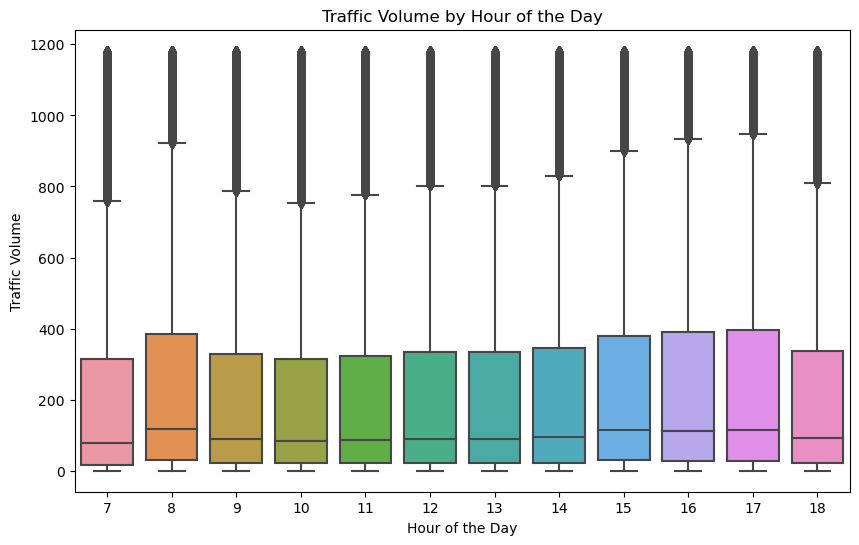

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming hourdata is your DataFrame
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='All_motor_vehicles', data=hourdata)
plt.title('Traffic Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.show()

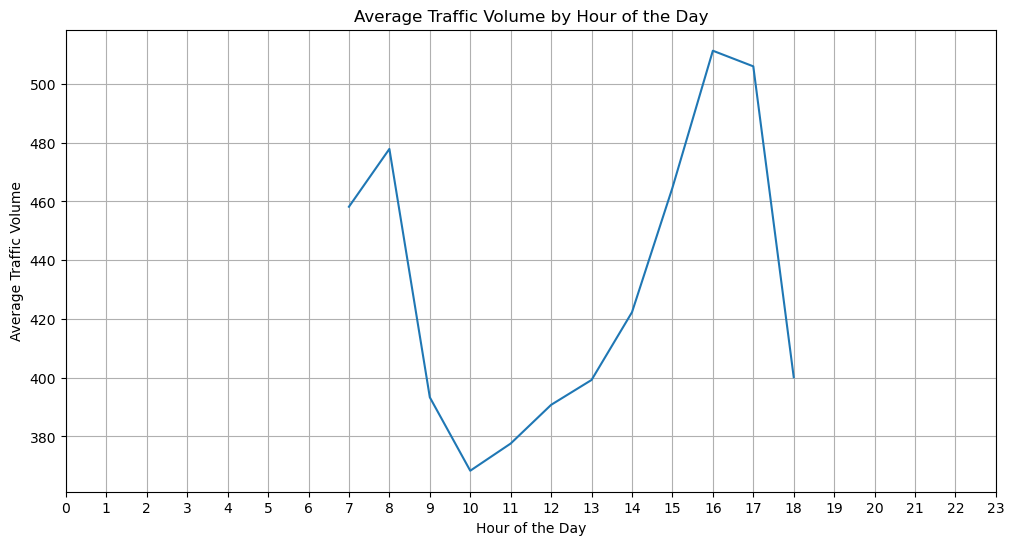

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by hour and calculate the mean traffic volume
hourly_traffic = hourdata.groupby('hour')['All_motor_vehicles'].mean()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values)
plt.title('Average Traffic Volume by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24))  # Assuming hour is in 24-hour format
plt.grid(True)
plt.show()

9. Correlation Analysis

In [24]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Select relevant features including the target variable
selected_features = ['hour', 'Year', 'Pedal_cycles', 'Two_wheeled_motor_vehicles', 'Cars_and_taxis',
                     'Buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
                     'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
                     'peak_non_peak_hour_evening_peak', 'peak_non_peak_hour_morning_peak', 'peak_non_peak_hour_non_peak', 'month', 'All_motor_vehicles']  # Add 'total_vehicles' for correlation analysis

# Creating a new dataframe with the selected features
feature_data = hourdata[selected_features]

# Calculate the correlation matrix
correlation_matrix = feature_data.corr()

# Display the correlation with the target variable
correlation_with_target = correlation_matrix['All_motor_vehicles'].sort_values(ascending=False)

print(correlation_with_target)

All_motor_vehicles                 1.000000
Cars_and_taxis                     0.988440
LGVs                               0.909901
HGVs_2_rigid_axle                  0.703118
All_HGVs                           0.604154
HGVs_3_rigid_axle                  0.577115
HGVs_4_or_more_rigid_axle          0.518969
Two_wheeled_motor_vehicles         0.442996
HGVs_3_or_4_articulated_axle       0.417538
Buses_and_coaches                  0.405098
HGVs_5_articulated_axle            0.382563
HGVs_6_articulated_axle            0.369136
Pedal_cycles                       0.149280
peak_non_peak_hour_evening_peak    0.025596
hour                               0.024088
Year                              -0.007279
peak_non_peak_hour_non_peak       -0.007665
peak_non_peak_hour_morning_peak   -0.015393
month                             -0.076655
Name: All_motor_vehicles, dtype: float64


10. Model Building using LSTM

10.1. Feature Selection and Data Splitting 

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Feature Selection based on Correlation Analysis
selected_features = [
    'peak_non_peak_hour_evening_peak', 'hour', 'peak_non_peak_hour_morning_peak', 'peak_non_peak_hour_non_peak',
    'month', 'Year', 'Cars_and_taxis','All_HGVs', 'Two_wheeled_motor_vehicles'
]

# Preparing the dataset for modeling
features = hourdata[selected_features]
target = hourdata['All_motor_vehicles']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [26]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Adjust dropout rate as needed
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

model.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred = model.predict(X_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                12000     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 12051 (47.07 KB)
Trainable params: 12051 (47.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
15875/15875 [==============================] - 94s 6ms/step - loss: 52508.4492 - val_loss: 13381.5693
Epoch 2/50
15875/15875 [==============================] - 93s 6ms/step - loss: 5570.2559 - val_loss: 932.6049
Epoch 3/50
15875/15875 [==============================] - 93s

In [27]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Calculating evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Output the metrics for the training set
print('Training Values for LSTM: ')
print('Training Mean Squared Error:', mse_train)
print('Training Root Mean Squared Error:', rmse_train)
print('Training Mean Absolute Error:', mae_train)
print('Training R-squared:', r2_train)

# Output the metrics for the test set 
print('Testing Values for LSTM: ')
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)
print('Test Mean Absolute Error:', mae)
print('Test R-squared:', r2)

24805/24805 [==============================] - 69s 3ms/step
Training Values for LSTM: 
Training Mean Squared Error: 279.60646405247275
Training Root Mean Squared Error: 16.72143726036948
Training Mean Absolute Error: 9.281141248742395
Training R-squared: 0.9963252267312451
Testing Values for LSTM: 
Test Mean Squared Error: 280.2695915193105
Test Root Mean Squared Error: 16.741254179998297
Test Mean Absolute Error: 9.28045719389702
Test R-squared: 0.996313474454926


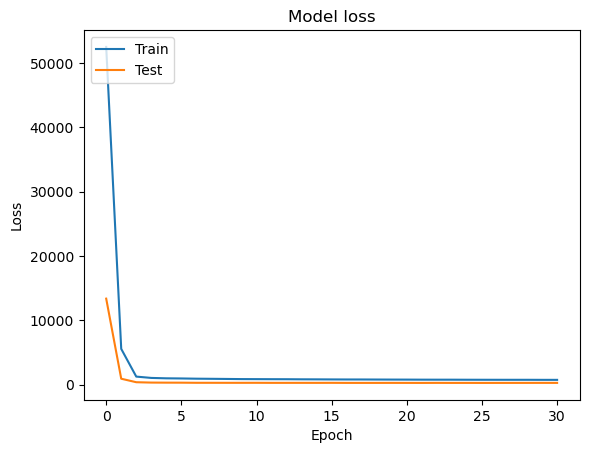

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

11. Model Building using GRU

Feature Selection and Data Spliting 

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Feature Selection based on Correlation Analysis
selected_features = [
    'peak_non_peak_hour_evening_peak', 'hour', 'peak_non_peak_hour_morning_peak', 'peak_non_peak_hour_non_peak',
    'month', 'Year', 'Cars_and_taxis','All_HGVs', 'Two_wheeled_motor_vehicles'
]

# Preparing the dataset for modeling
features = hourdata[selected_features]
target = hourdata['All_motor_vehicles']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [30]:
# Building the GRU model
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model_gru.add(Dropout(0.2)) 
model_gru.add(Dense(1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model_gru.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model_gru.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model_gru.evaluate(X_test, y_test, verbose=0)

# Predictions
y_pred = model_gru.predict(X_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                9150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 9201 (35.94 KB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
15875/15875 [==============================] - 98s 6ms/step - loss: 43677.1328 - val_loss: 6608.5371
Epoch 2/50
15875/15875 [==============================] - 94s 6ms/step - loss: 2630.3091 - val_loss: 424.3518
Epoch 3/50
15875/15875 [==============================] - 94s 

In [31]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Predictions on training set
y_train_pred = model.predict(X_train)

# Calculating evaluation metrics for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Output the metrics for the training set
print('Training Values for GRU: ')
print('Training Mean Squared Error:', mse_train)
print('Training Root Mean Squared Error:', rmse_train)
print('Training Mean Absolute Error:', mae_train)
print('Training R-squared:', r2_train)

# Output the metrics for the test set 
print('Testing Values for GRU: ')
print('Test Mean Squared Error:', mse)
print('Test Root Mean Squared Error:', rmse)
print('Test Mean Absolute Error:', mae)
print('Test R-squared:', r2)

24805/24805 [==============================] - 62s 2ms/step
Training Values for GRU: 
Training Mean Squared Error: 279.60646405247275
Training Root Mean Squared Error: 16.72143726036948
Training Mean Absolute Error: 9.281141248742395
Training R-squared: 0.9963252267312451
Testing Values for GRU: 
Test Mean Squared Error: 273.7050664032105
Test Root Mean Squared Error: 16.544034163504694
Test Mean Absolute Error: 9.106644350197513
Test R-squared: 0.9963998209236977


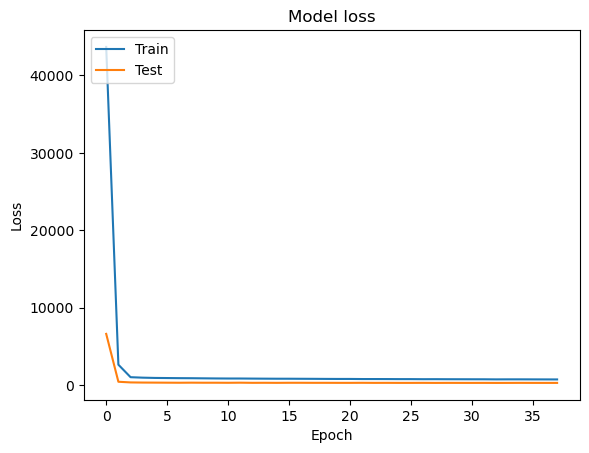

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

12. Model Building using CNN

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Feature Selection based on Correlation Analysis
selected_features = [
    'peak_non_peak_hour_evening_peak', 'hour', 'peak_non_peak_hour_morning_peak', 'peak_non_peak_hour_non_peak',
    'month', 'Year', 'Cars_and_taxis','All_HGVs', 'Two_wheeled_motor_vehicles'
]

# Preparing the dataset for modeling
features = hourdata[selected_features]
target = hourdata['All_motor_vehicles']
# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Reshape input for CNN [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [34]:
# Building the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model_cnn.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model with early stopping
history = model_cnn.fit(X_train, y_train, epochs=50, batch_size=50, validation_data=(X_test, y_test), verbose=1, shuffle=False, callbacks=[early_stopping])

# Evaluating the model
loss = model_cnn.evaluate(X_test, y_test, verbose=0)

# Predictions
#y_pred = model_cnn.predict(X_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                9650      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                      

In [35]:
# Correct predictions on training set for CNN
y_train_pred_cnn = model_cnn.predict(X_train)

# Correct calculations of evaluation metrics for the training set of CNN
mse_train_cnn = mean_squared_error(y_train, y_train_pred_cnn)
rmse_train_cnn = np.sqrt(mse_train_cnn)
mae_train_cnn = mean_absolute_error(y_train, y_train_pred_cnn)
r2_train_cnn = r2_score(y_train, y_train_pred_cnn)

# Output the correct metrics for the training set of CNN
print('Training Values for CNN: ')
print('Training Mean Squared Error:', mse_train_cnn)
print('Training Root Mean Squared Error:', rmse_train_cnn)
print('Training Mean Absolute Error:', mae_train_cnn)
print('Training R-squared:', r2_train_cnn)

# Ensure you are using the correct model for test set predictions as well
y_pred_cnn = model_cnn.predict(X_test)

# Calculate the evaluation metrics for the test set of CNN
mse_test_cnn = mean_squared_error(y_test, y_pred_cnn)
mae_test_cnn = mean_absolute_error(y_test, y_pred_cnn)
rmse_test_cnn = np.sqrt(mse_test_cnn)
r2_test_cnn = r2_score(y_test, y_pred_cnn)

# Output the metrics for the test set of CNN
print('Testing Values for CNN: ')
print('Test Mean Squared Error:', mse_test_cnn)
print('Test Root Mean Squared Error:', rmse_test_cnn)
print('Test Mean Absolute Error:', mae_test_cnn)
print('Test R-squared:', r2_test_cnn)

24805/24805 [==============================] - 52s 2ms/step
Training Values for CNN: 
Training Mean Squared Error: 881.9348361536269
Training Root Mean Squared Error: 29.69738769915002
Training Mean Absolute Error: 18.432469772970748
Training R-squared: 0.9884090284834299
6202/6202 [==============================] - 14s 2ms/step
Testing Values for CNN: 
Test Mean Squared Error: 893.4755255135284
Test Root Mean Squared Error: 29.891060963330297
Test Mean Absolute Error: 18.529884814214007
Test R-squared: 0.9882476713551098


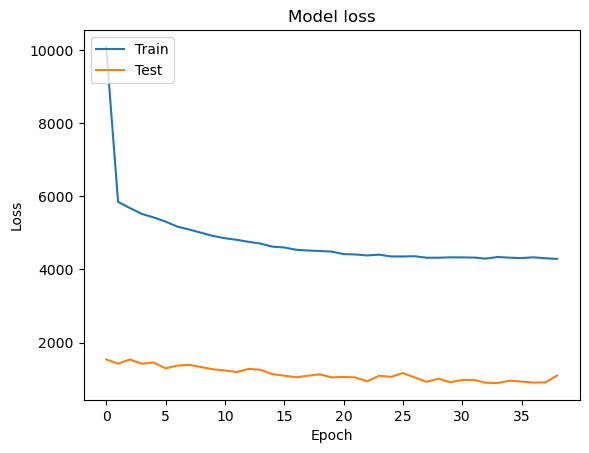

In [36]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()